# ADS Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem Description

-- Input some description here --

## 1) Loading & Cleaning the Data

In [2]:
#load Data Functions
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list

In [3]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)
    

In [4]:
# Merging all df from df list


df_list["MarketCap"] = df_list["MarketCap"].drop(columns="MarketCap")

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = df_list["BtcPrice"][1:].sort_index(ascending=False).Price.values

In [5]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [6]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

,Date,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
0,2015-07-30,7.204931e+07,9205.0,8893.0,0.121,11.5297,0.0,0.0,0.0,6912.0,644.0,4.46,39316.09375,0.0,0.0,1299.0,287.0,0.0
1,2015-07-31,7.208550e+07,9361.0,0.0,0.603,51.4594,0.0,0.0,0.0,6863.0,582.0,12.58,36191.71875,0.0,0.0,511.0,283.7,0.0
2,2015-08-01,7.211320e+07,9476.0,0.0,0.887,57.7845,0.0,0.0,0.0,5293.0,575.0,16.34,27705.93750,0.0,0.0,334.0,280.5,0.0
3,2015-08-02,7.214143e+07,9563.0,0.0,1.020,67.9224,0.0,0.0,0.0,5358.0,581.0,16.12,28223.43750,0.0,0.0,394.0,281.4,0.0
4,2015-08-03,7.216940e+07,9639.0,0.0,1.126,74.5737,0.0,0.0,0.0,5280.0,587.0,16.37,27976.71875,0.0,0.0,443.0,281.6,0.0


## 2) Exploratory Data Analysis

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
Date                  1500 non-null datetime64[ns]
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
dtypes: datetime64[ns](1), float64(17)
memory usage: 211.0 KB


In [8]:
df_data.describe()

,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
count,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.00000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000
mean,9.213726e+07,2.152700e+07,3.573513e+05,1381.216629,103992.366783,0.468355,3.479465e+20,2.968093e+10,5666.337333,11803.14200,15.364400,23750.603146,5.864147e+06,1.993741e+10,617.044667,4125.926667,204.687733
std,1.072118e+07,2.498827e+07,3.256708e+05,1298.972394,102427.282277,0.372758,4.951416e+20,4.294052e+10,720.416553,9993.41593,2.797517,6437.954850,2.149345e+06,1.830498e+10,370.151816,3947.399550,250.083641
min,7.204931e+07,9.205000e+03,0.000000e+00,0.121000,11.529700,0.000000,0.000000e+00,0.000000e+00,2829.000000,575.00000,4.460000,12869.625000,0.000000e+00,0.000000e+00,126.000000,211.400000,0.000000
25%,8.278264e+07,5.229082e+05,4.175475e+04,59.658250,4471.975825,0.056725,3.404057e+19,1.497751e+10,5234.250000,1523.00000,13.950000,20230.968750,4.009369e+06,1.351073e+09,376.000000,610.250000,10.950000
50%,9.407962e+07,5.975766e+06,3.061815e+05,1444.464500,92156.117400,0.569950,2.910479e+20,2.251696e+10,5946.000000,13026.50000,14.340000,21226.718750,6.715085e+06,1.554304e+10,462.500000,3418.500000,136.045000
75%,1.016003e+08,4.406175e+07,6.285058e+05,2505.067250,179726.672575,0.831900,4.513010e+20,2.688101e+10,6080.000000,20983.25000,16.370000,30987.929688,7.997891e+06,3.956602e+10,774.000000,6721.075000,295.085000
max,1.076359e+08,7.469110e+07,1.349890e+06,3606.036000,295911.997400,0.969000,5.862526e+21,9.395883e+11,6912.000000,36630.00000,30.310000,39316.093750,8.004217e+06,4.936428e+10,2096.000000,19345.500000,1385.020000


In [9]:
# Correlations
df_corr = df_data.corr()
df_corr

,Supply,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
Supply,1.000000,0.871879,0.843540,0.840346,0.823709,0.905329,0.474226,-0.337491,0.288837,0.870169,-0.187655,-0.792496,0.887071,0.902041,0.332875,0.733790,0.511601
AddressCount,0.871879,1.000000,0.789259,0.766725,0.782175,0.811562,0.380650,-0.233489,0.362446,0.804732,-0.288567,-0.857087,0.813752,0.891032,0.243759,0.651342,0.334379
TxGrowth,0.843540,0.789259,1.000000,0.851423,0.875319,0.936036,0.647129,-0.214922,0.245369,0.965090,-0.197697,-0.808046,0.888451,0.959463,0.634506,0.923400,0.797612
Difficulty,0.840346,0.766725,0.851423,1.000000,0.974904,0.928816,0.539480,-0.234873,0.041182,0.915648,0.019681,-0.788789,0.898953,0.904746,0.557167,0.751845,0.680616
NetworkHash,0.823709,0.782175,0.875319,0.974904,1.000000,0.902719,0.550765,-0.232651,0.214247,0.901368,-0.173559,-0.740443,0.885202,0.928528,0.654439,0.782741,0.702010
NetworkUtilization,0.905329,0.811562,0.936036,0.928816,0.902719,1.000000,0.627518,-0.236102,0.088811,0.975272,-0.017440,-0.859511,0.906912,0.961191,0.535564,0.845872,0.710283
TransactionFee,0.474226,0.380650,0.647129,0.539480,0.550765,0.627518,1.000000,0.076165,0.034146,0.634351,-0.034050,-0.442397,0.542742,0.603379,0.582100,0.645400,0.659227
AvgGasPrice,-0.337491,-0.233489,-0.214922,-0.234873,-0.232651,-0.236102,0.076165,1.000000,-0.193311,-0.220846,0.141051,0.152590,-0.283996,-0.238085,-0.074185,-0.179950,-0.109099
BlockCountReward,0.288837,0.362446,0.245369,0.041182,0.214247,0.088811,0.034146,-0.193311,1.000000,0.110668,-0.966166,0.038047,0.174196,0.292405,0.265952,0.238820,0.018776
BlockSize,0.870169,0.804732,0.965090,0.915648,0.901368,0.975272,0.634351,-0.220846,0.110668,1.000000,-0.046829,-0.854043,0.912690,0.961338,0.573232,0.879677,0.749189


### Data Visualization

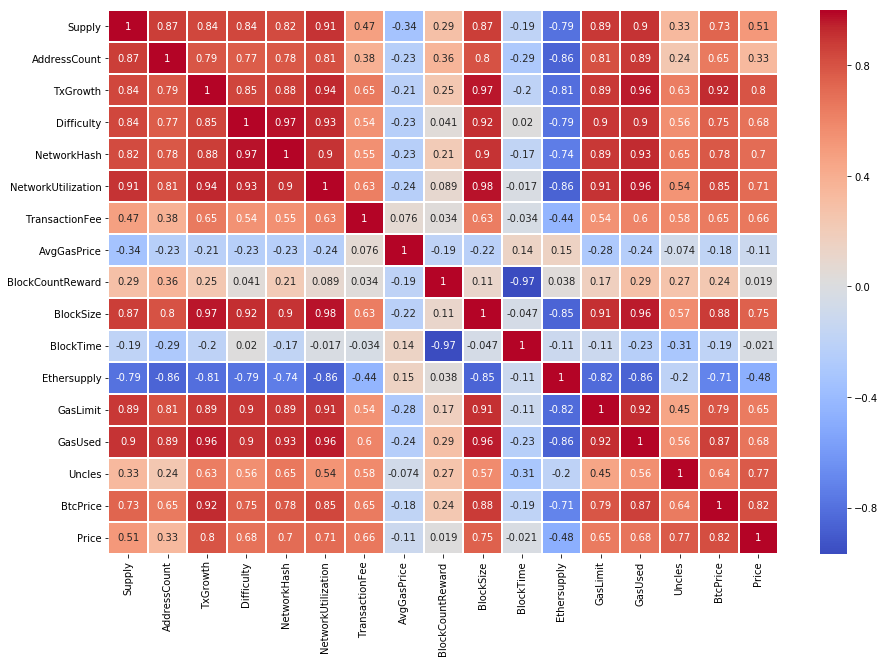

In [10]:
# Visualizations - HeatMap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,linecolor='white',linewidth='1',cmap='coolwarm',annot=True)

In [11]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

a = chunkIt(df_data.columns.values[:-1], 4)

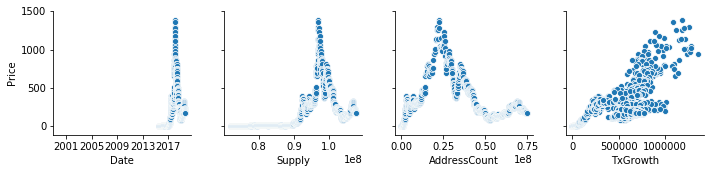

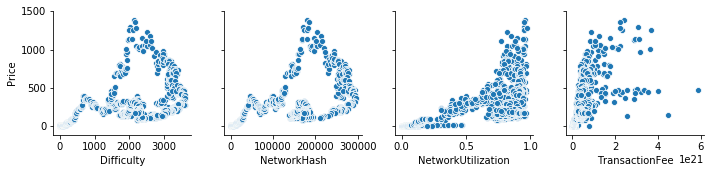

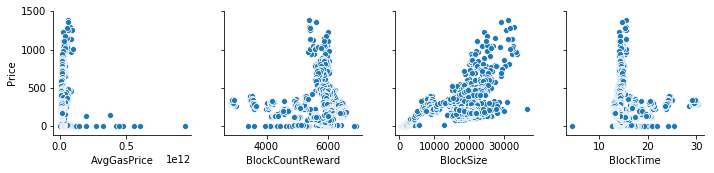

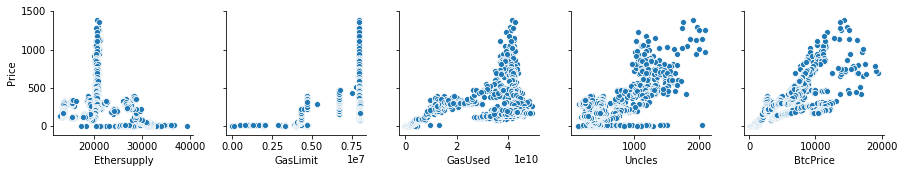

In [12]:
for column in a:
    sns.pairplot(data=df_data,
                      y_vars=['Price'],
                      x_vars= column)
    plt.show()

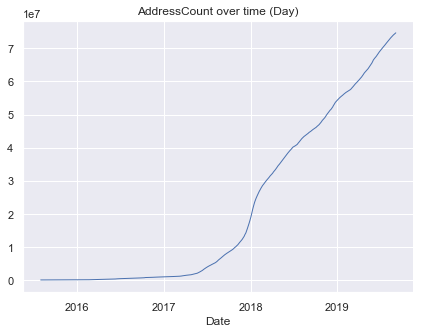

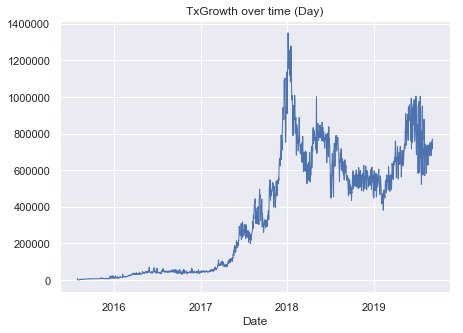

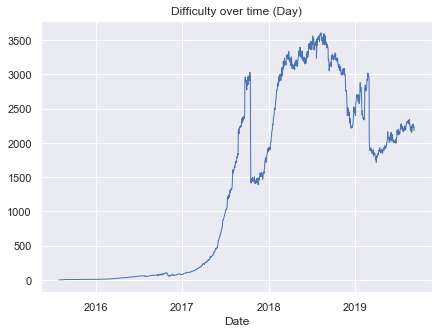

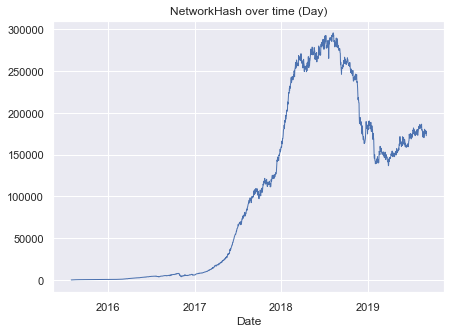

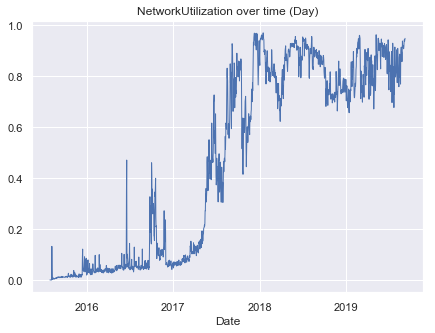

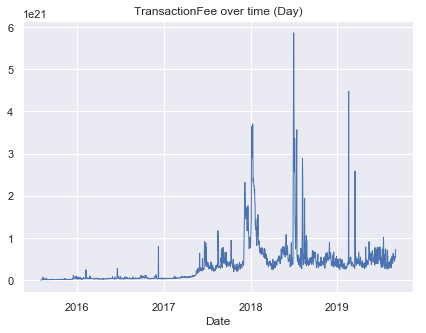

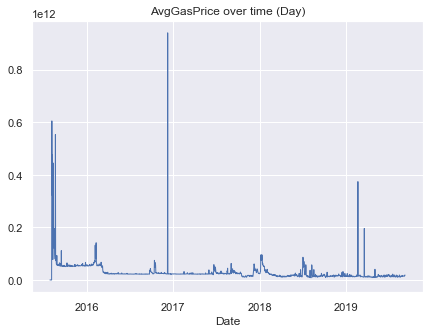

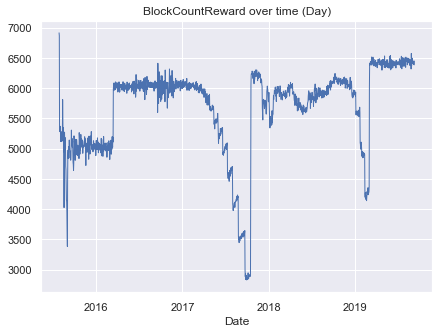

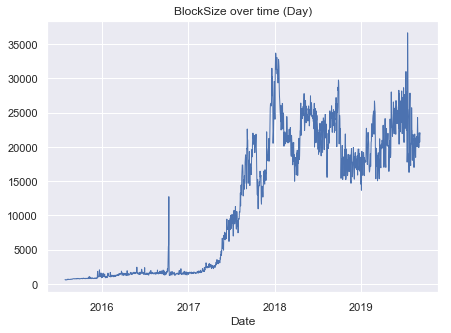

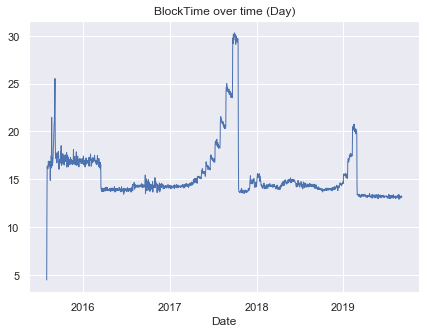

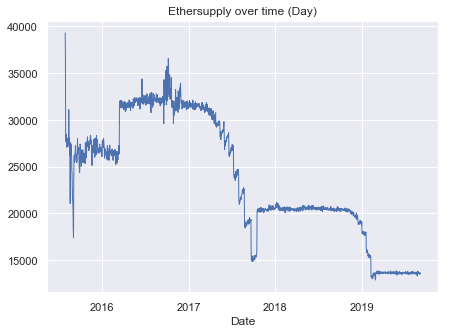

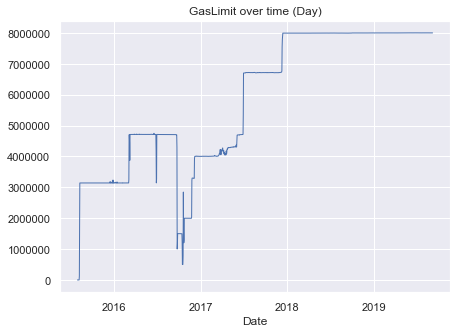

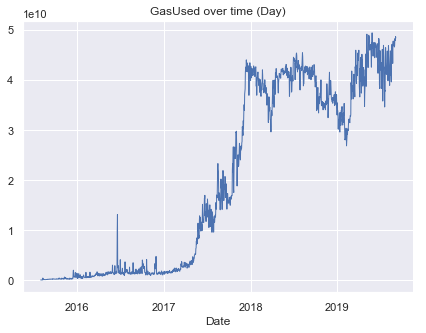

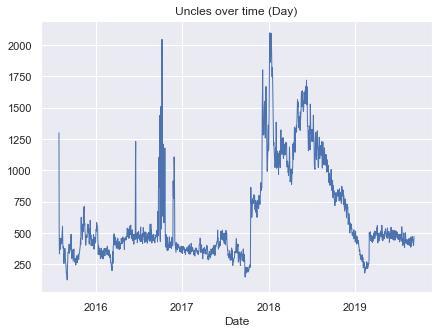

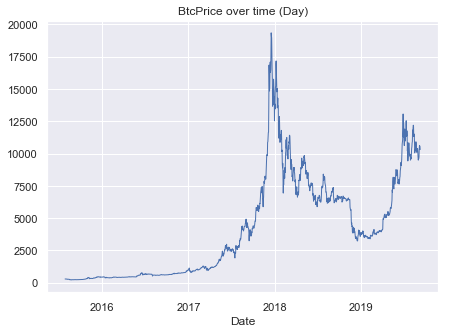

In [13]:
# Time Series Analysis
df_time = df_data.set_index('Date').copy()

df_time['Year'] = df_time.index.year
df_time['Month'] = df_time.index.month
df_time['Weekday Name'] = df_time.index.weekday_name


df_time.head()

sns.set_style("dark")
sns.set(rc={'figure.figsize':(7, 5)})

for element in columns[1:]:
    plt.show()
    df_time[element].plot(linewidth=1,title = element+" over time (Day)");

### Seasonality Plot

Text(0.5,1,'Monthly Seasonality')

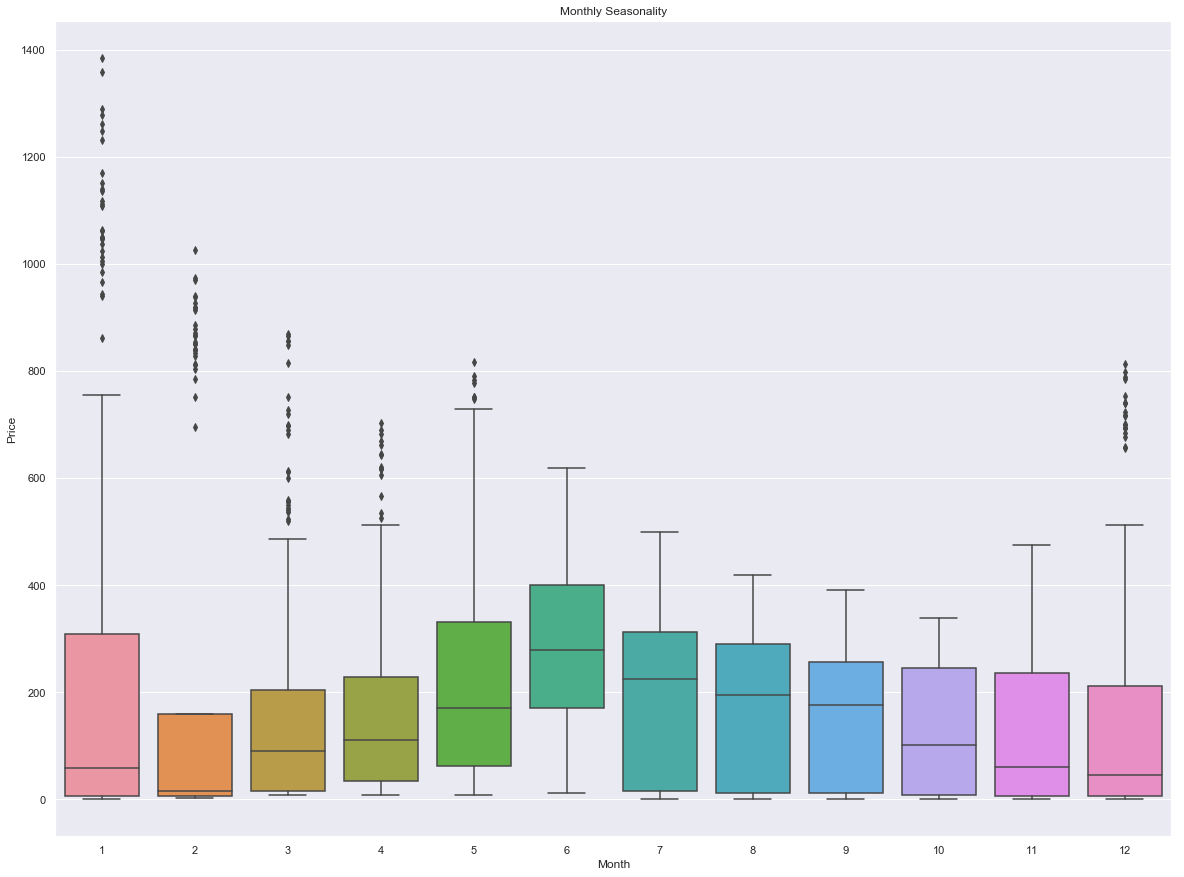

In [14]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Month', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title("Monthly Seasonality")

Text(0.5,1,'Weekly Seasonality')

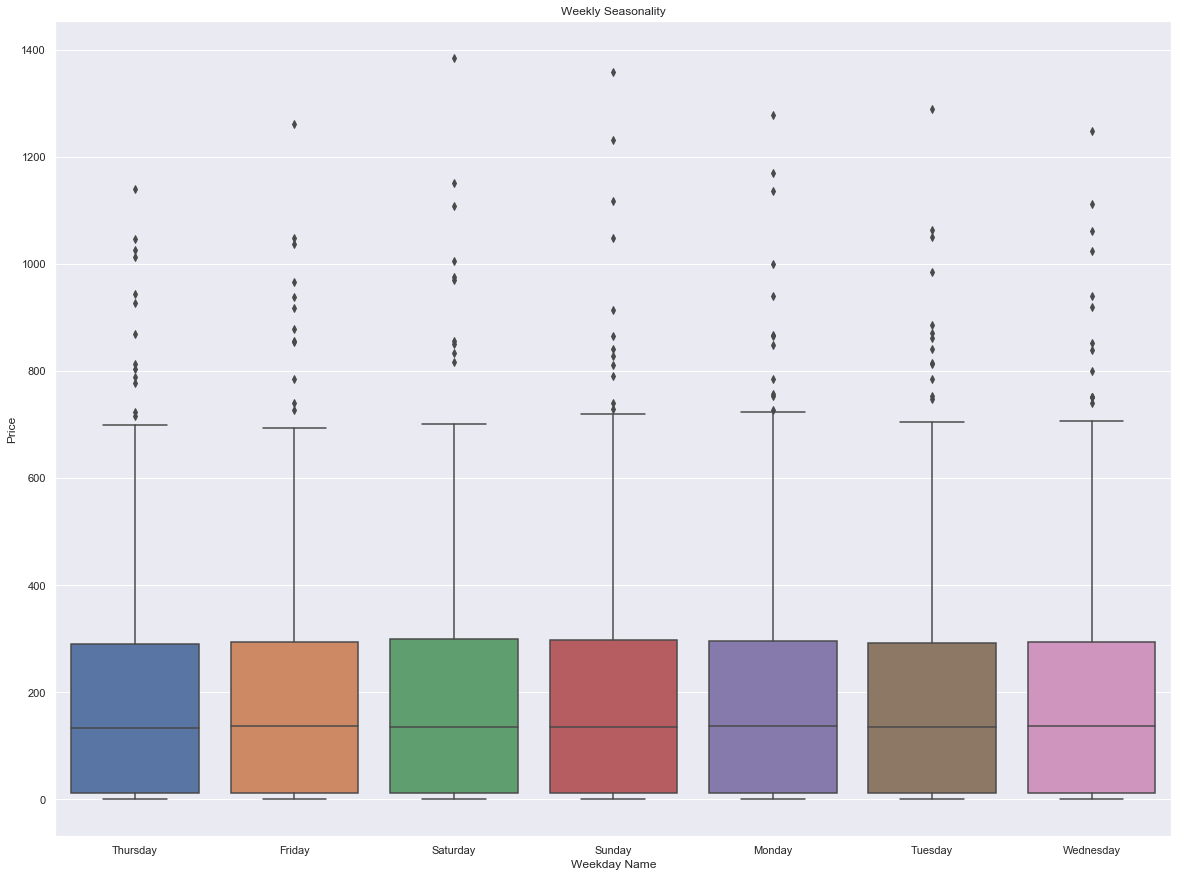

In [15]:
#Weekly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Weekday Name', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title("Weekly Seasonality")

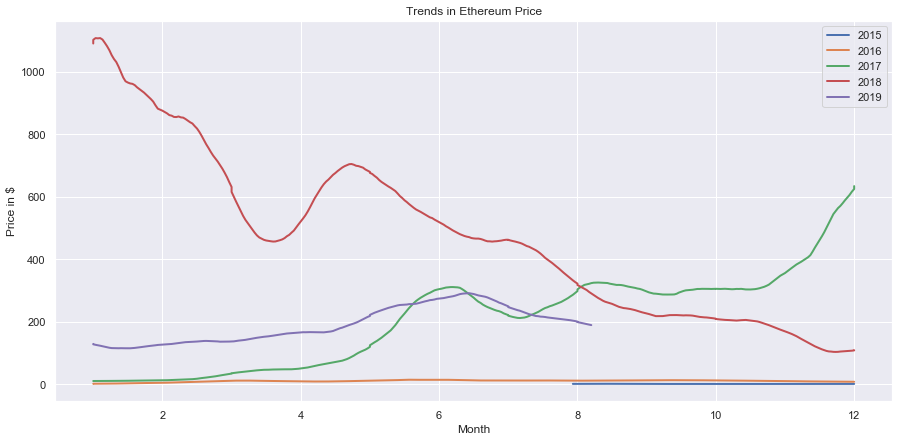

In [16]:
years = ['2015','2016','2017','2018','2019']
test = {}
for year in years:
    test[year] = df_time[year][["Month","Price"]].rolling(30, center=True).mean()
    
fig, ax = plt.subplots(figsize=(15, 7))
for a in test:
    ax.plot(test[a]["Month"],test[a]["Price"], linewidth=2, label= a)

ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');

From the plots below, we could see that there's no seasonality in Etherium Price. Neither by monthly nor weekly

### Trend Plot

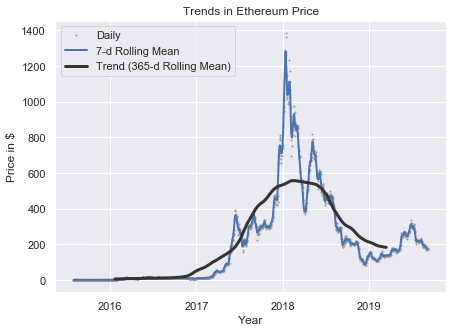

In [17]:
import matplotlib.dates as mdates

column='Price'
data_columns = ['Price']

def plot_trend(column, data):
    df_time_365d = data[[column]].rolling(window=365, center=True, min_periods=360).mean()
    df_time_7d = data[[column]].rolling(7, center=True).mean()

    # Plot daily, 7-day rolling mean, and 365-day rolling mean time series
    fig, ax = plt.subplots()
    ax.plot(data[column], marker='.', markersize=2, color='0.6',
    linestyle='None', label='Daily')
    ax.plot(df_time_7d[column], linewidth=2, label='7-d Rolling Mean')
    ax.plot(df_time_365d[column], color='0.2', linewidth=3,
    label='Trend (365-d Rolling Mean)')

    # Set x-ticks to yearly interval and add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Price in $')
    ax.set_title('Trends in Ethereum Price');

plot_trend("Price",df_time )

## 3) Feature Engineering

In [18]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1500 entries, 2015-07-30 to 2019-09-06
Data columns (total 20 columns):
Supply                1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
Year                  1500 non-null int64
Month                 1500 non-null int64
Weekday Name          1500 non-null object


In [19]:
#set Y variable
etherPrice = df_data[['Date','Price']].set_index('Date')


### Normalization

In [20]:
from sklearn import preprocessing

def normalise_var(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalised_features = pd.DataFrame(columns=x.columns.values, data=x_scaled)
    return normalised_features


### Feature for TS model

In [24]:

x_var = df_data.iloc[:,1:-1] 
normalised_TS_features = normalise_var(x_var)
#make into timeseries
normalised_TS_features["Date"] = df_data["Date"]
normalised_TS_features = normalised_TS_features.set_index('Date')


### Feature with suprevised learning

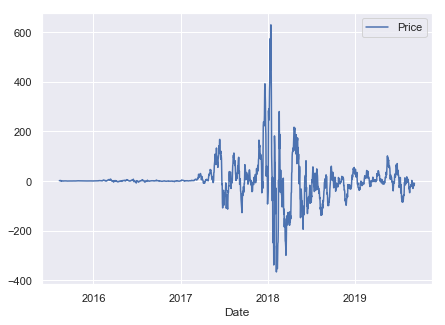

In [25]:
#Make Stationary
differenced = etherPrice.diff(12)
differenced = differenced[12:]
# Seasonality Adjusted
differenced.plot()
plt.show()

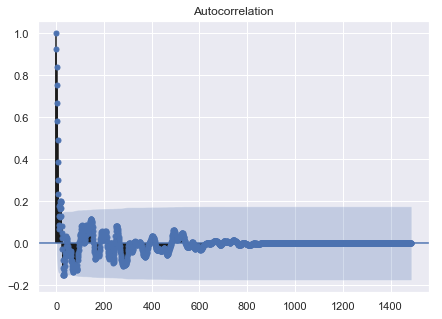

In [26]:
# Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(differenced)
plt.show()

In [27]:
# reframe as supervised learning
lag_var = pd.DataFrame()
for i in range(12,0,-1):
    lag_var['t-'+str(i)] = differenced["Price"].shift(i).values
lag_var['t'] = differenced["Price"].values
display(lag_var.head(13))
lag_var = lag_var[13:]

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37
6,NaN,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20
7,NaN,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27
8,NaN,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27,-1.51
9,NaN,NaN,NaN,1.06,1.25,1.78,1.80,1.79,1.37,1.20,1.27,-1.51,0.67


In [28]:
normalise_Lag_features = normalise_var(lag_var)

In [29]:
normalise_Lag_features.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,0.369606,0.370138,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340
1,0.370138,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737
2,0.370158,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707
3,0.370148,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707,0.367687
4,0.369726,0.369556,0.369626,0.366833,0.369023,0.369053,0.369063,0.368642,0.368340,0.367737,0.367707,0.367687,0.368280


### Feature Importance plots and selection

1) Random Forest Regression. We can use feature importance to help to estimate the relative importance of contrived input features for time series forecasting.
2) A popular method for feature selection is called Recursive Feature Selection (RFE). RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left. Smaller is better

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

def plot_featimp(X,y):
    # fit random forest model
    model = RandomForestRegressor(n_estimators=500, random_state=1)
    model.fit(X, y)
    # show importance scores
    print(model.feature_importances_)
    # plot importance scores
    names = X.columns.values
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, model.feature_importances_)
    plt.xticks(ticks, names, rotation='vertical')
    plt.title("Feature Importance")
    plt.show()
    

def select_feature(X,y):
    rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
    fit = rfe.fit(X, y)
    # report selected features
    print('Selected Features:')
    names = X.columns.values
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, fit.ranking_)
    plt.xticks(ticks, names, rotation="vertical")
    plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.04764777 0.04812178 0.01529653 0.02647671 0.02928354 0.00541375
 0.00272383 0.00099691 0.00166554 0.00389165 0.00070278 0.00592179
 0.05668781 0.0105905  0.58459207 0.15998706]


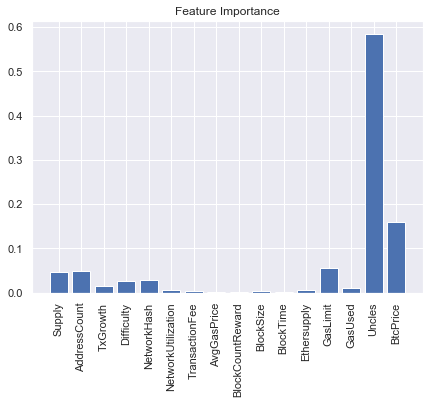

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected Features:
Supply
AddressCount
Uncles
BtcPrice


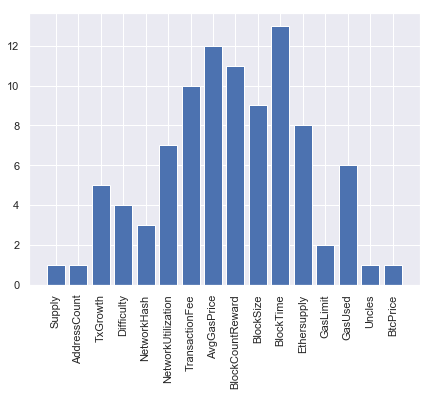

In [31]:
# with ts model
plot_featimp(normalised_TS_features,etherPrice)
select_feature(normalised_TS_features,etherPrice)

[0.01030228 0.01136461 0.00935514 0.00904723 0.0092302  0.01067421
 0.01025248 0.00759406 0.01003438 0.01490129 0.03940738 0.85783675]


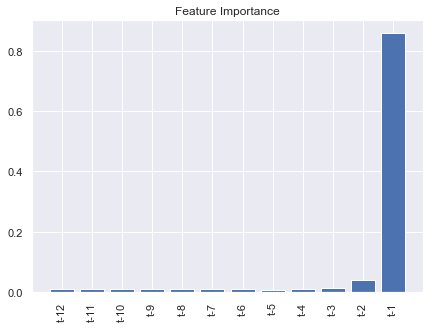

Selected Features:
t-11
t-7
t-2
t-1


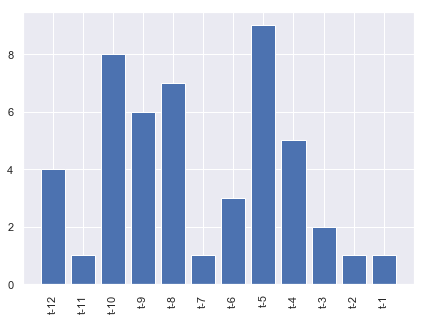

In [35]:
from sklearn.ensemble import RandomForestRegressor

X = normalise_Lag_features.iloc[:,0:-1]
y = normalise_Lag_features.iloc[:,-1]

# with supervised learning
plot_featimp(X,y)
select_feature(X,y)

# DATA STATIONARITY FROM TAMRA VIDEO

In [102]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return dfoutput['p-value']

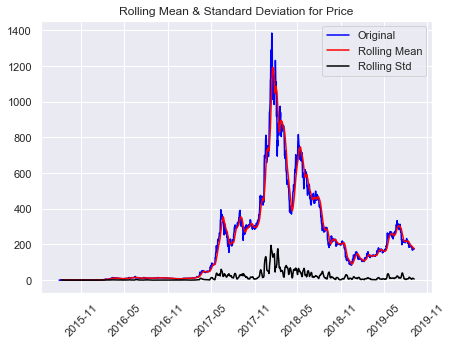

Results of Dickey-Fuller Test:
Test Statistic                   -2.074704
p-value                           0.254807
# Lags Used                      23.000000
Number of Observations Used    1476.000000
Critical Value (1%)              -3.434788
Critical Value (5%)              -2.863500
Critical Value (10%)             -2.567814
dtype: float64


In [41]:
test_stationarity(etherPrice,"Price")

To make it stationary, the P-value needs to be <= 0.05, but since it's 0.25 so our data is not stationary and we need to try some transformation to make it stationary

In [42]:
def plot_transformed_data(df, ts, ts_transform):
  # Plot time series data
    fig, ax = plt.subplots(1,1)
    ax.plot(df[ts])
    ax.plot(df[ts_transform], color = 'red')

    # Add title
    ax.set_title('%s and %s time-series graph' %(ts, ts_transform))

    # Rotate x-labels
    ax.tick_params(axis = 'x', rotation = 45)

    # Add legend
    ax.legend([ts, ts_transform])

    plt.show()

/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Price,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff
Date,,,,,,,,,
2015-08-13,1.78,0.576613,0.139912,1.298571,0.353470,0.481429,0.436701,0.576613,0.000000
2015-08-14,1.80,0.587787,0.078332,1.160000,0.011173,0.640000,0.509455,0.582476,0.005310
2015-08-15,1.79,0.582216,0.191609,1.300000,-0.005571,0.490000,0.390607,0.582381,-0.000165
2015-08-16,1.37,0.314811,0.279597,1.390000,-0.267405,-0.020000,0.035214,0.505250,-0.190440
2015-08-17,1.20,0.182322,0.360737,1.464286,-0.132489,-0.264286,-0.178416,0.427286,-0.244964


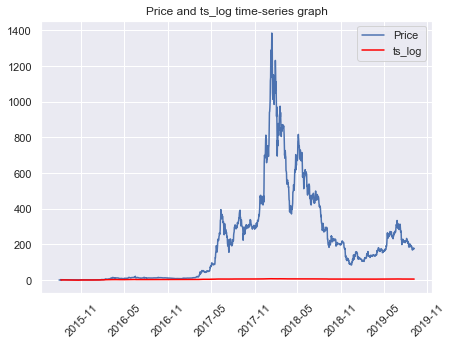

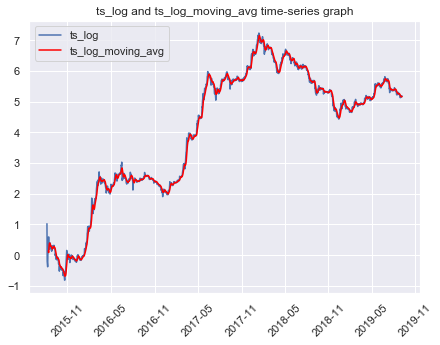

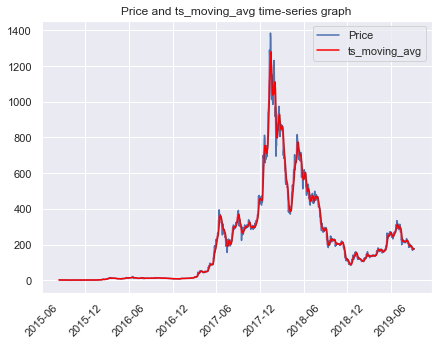

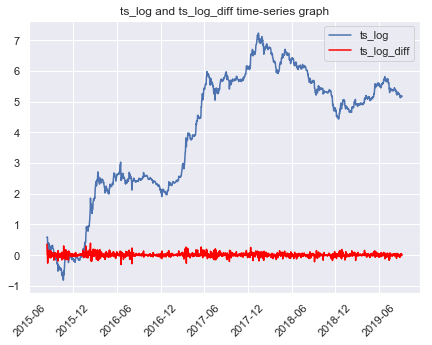

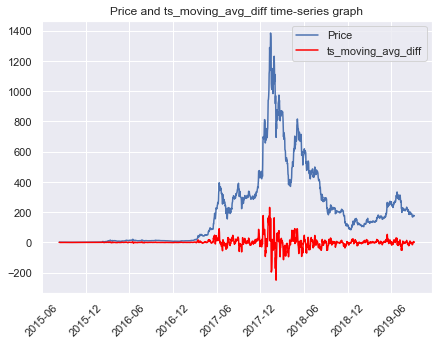

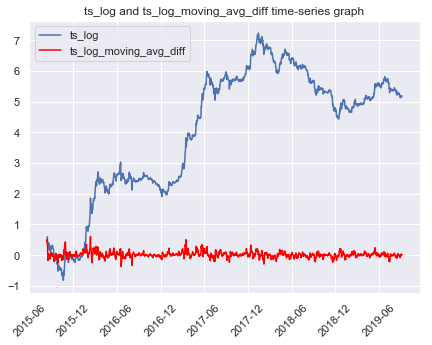

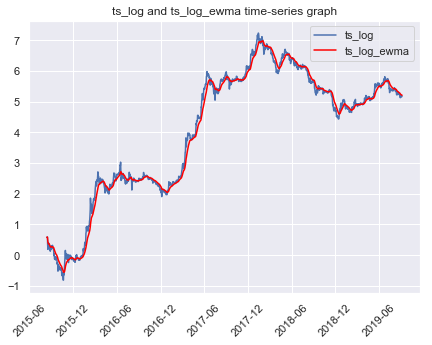

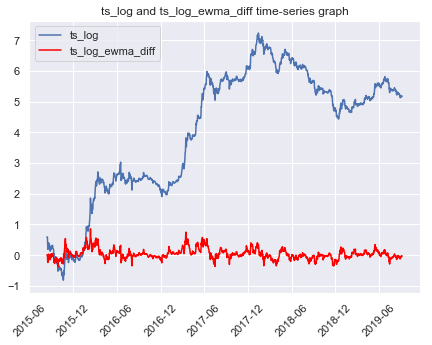

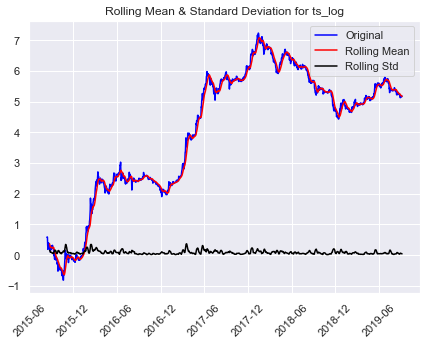

Results of Dickey-Fuller Test:
Test Statistic                   -1.751921
p-value                           0.404579
# Lags Used                       3.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64


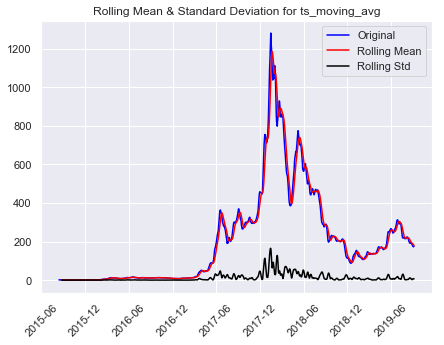

Results of Dickey-Fuller Test:
Test Statistic                   -2.137664
p-value                           0.229642
# Lags Used                      24.000000
Number of Observations Used    1461.000000
Critical Value (1%)              -3.434834
Critical Value (5%)              -2.863520
Critical Value (10%)             -2.567824
dtype: float64


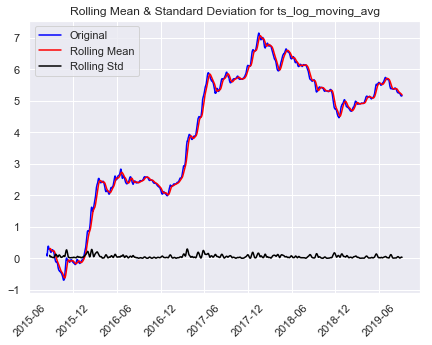

Results of Dickey-Fuller Test:
Test Statistic                   -1.739968
p-value                           0.410646
# Lags Used                      23.000000
Number of Observations Used    1462.000000
Critical Value (1%)              -3.434831
Critical Value (5%)              -2.863519
Critical Value (10%)             -2.567824
dtype: float64


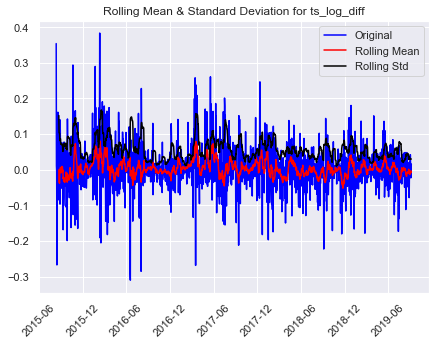

Results of Dickey-Fuller Test:
Test Statistic                  -20.742465
p-value                           0.000000
# Lags Used                       2.000000
Number of Observations Used    1483.000000
Critical Value (1%)              -3.434767
Critical Value (5%)              -2.863491
Critical Value (10%)             -2.567809
dtype: float64


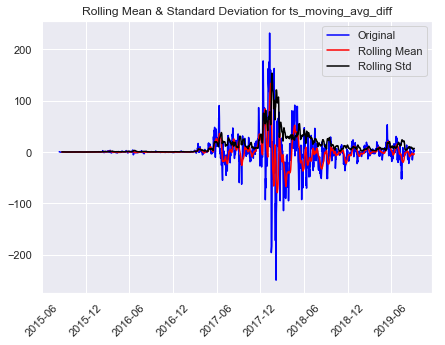

Results of Dickey-Fuller Test:
Test Statistic                -7.163487e+00
p-value                        2.926811e-10
# Lags Used                    2.000000e+01
Number of Observations Used    1.465000e+03
Critical Value (1%)           -3.434822e+00
Critical Value (5%)           -2.863515e+00
Critical Value (10%)          -2.567821e+00
dtype: float64


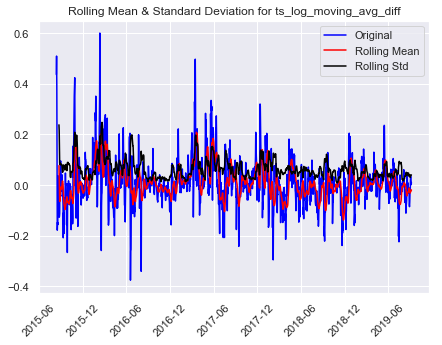

Results of Dickey-Fuller Test:
Test Statistic                -6.837409e+00
p-value                        1.827535e-09
# Lags Used                    1.400000e+01
Number of Observations Used    1.471000e+03
Critical Value (1%)           -3.434803e+00
Critical Value (5%)           -2.863507e+00
Critical Value (10%)          -2.567817e+00
dtype: float64


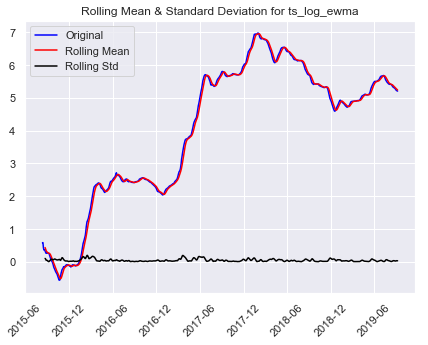

Results of Dickey-Fuller Test:
Test Statistic                   -1.546149
p-value                           0.510571
# Lags Used                       2.000000
Number of Observations Used    1483.000000
Critical Value (1%)              -3.434767
Critical Value (5%)              -2.863491
Critical Value (10%)             -2.567809
dtype: float64


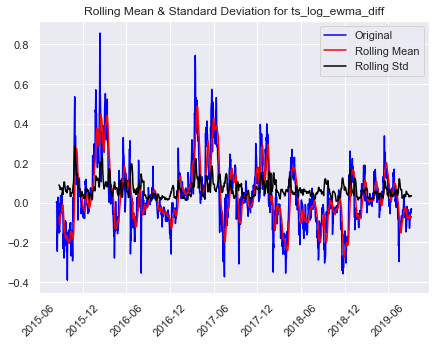

Results of Dickey-Fuller Test:
Test Statistic                -6.791175e+00
p-value                        2.362577e-09
# Lags Used                    1.000000e+00
Number of Observations Used    1.484000e+03
Critical Value (1%)           -3.434764e+00
Critical Value (5%)           -2.863490e+00
Critical Value (10%)          -2.567808e+00
dtype: float64


In [105]:
# Transformation - log ts
etherPrice['ts_log'] = etherPrice['Price'].apply(lambda x: np.log(x))

# Transformation - 7-day moving averages of log ts
etherPrice['ts_log_moving_avg'] = etherPrice['ts_log'].rolling(window = 7,
                                                               center = False).mean()

# Transformation - 7-day moving average ts
etherPrice['ts_moving_avg'] =  etherPrice['Price'].rolling(window = 7,
                                                       center = False).mean()

# Transformation - Difference between logged ts and first-order difference logged ts
# df_example['ts_log_diff'] = df_example['ts_log'] - df_example['ts_log'].shift()
etherPrice['ts_log_diff'] = etherPrice['ts_log'].diff()

# Transformation - Difference between ts and moving average ts
etherPrice['ts_moving_avg_diff'] = etherPrice['Price'] - etherPrice['ts_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
etherPrice['ts_log_moving_avg_diff'] = etherPrice['ts_log'] - etherPrice['ts_log_moving_avg']

# Transformation - Difference between logged ts and logged moving average ts
df_example_transform = etherPrice.dropna()

# Transformation - Logged exponentially weighted moving averages (EWMA) ts
df_example_transform['ts_log_ewma'] = df_example_transform['ts_log'].ewm(halflife = 7,
                                                                         ignore_na = False,
                                                                         min_periods = 0,
                                                                         adjust = True).mean()

# Transformation - Difference between logged ts and logged EWMA ts
df_example_transform['ts_log_ewma_diff'] = df_example_transform['ts_log'] - df_example_transform['ts_log_ewma']

# Display data
display(df_example_transform.head())

# Plot data
plot_transformed_data(df = etherPrice, 
                      ts = 'Price', 
                      ts_transform = 'ts_log')
# Plot data
plot_transformed_data(df = etherPrice, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'Price', 
                      ts_transform = 'ts_moving_avg')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'Price', 
                      ts_transform = 'ts_moving_avg_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_moving_avg_diff')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma')

# Plot data
plot_transformed_data(df = df_example_transform, 
                      ts = 'ts_log', 
                      ts_transform = 'ts_log_ewma_diff')

p_values = {}
# Perform stationarity test
p_values["ts_log"] = test_stationarity(df = df_example_transform, ts = 'ts_log')

# Perform stationarity test
p_values["ts_moving_avg"] = test_stationarity(df = df_example_transform, 
                  ts = 'ts_moving_avg')

# Perform stationarity test
p_values["ts_log_moving_avg"] = test_stationarity(df = df_example_transform, 
                  ts = 'ts_log_moving_avg')

# Perform stationarity test
p_values["ts_log_diff"] = test_stationarity(df = df_example_transform,
                  ts = 'ts_log_diff')

# Perform stationarity test
p_values["ts_moving_avg_diff"] = test_stationarity(df = df_example_transform,
                  ts = 'ts_moving_avg_diff')

# Perform stationarity test
p_values["ts_log_moving_avg_diff"] = test_stationarity(df = df_example_transform,
                  ts = 'ts_log_moving_avg_diff')

# Perform stationarity test
p_values["ts_log_ewma"] = test_stationarity(df = df_example_transform, 
                  ts = 'ts_log_ewma')

# Perform stationarity test
p_values["ts_log_ewma_diff"] = test_stationarity(df = df_example_transform,
                  ts = 'ts_log_ewma_diff')


In [106]:
print(p_values)

{'ts_log': 0.40457917334827515, 'ts_moving_avg': 0.22964160811680623, 'ts_log_moving_avg': 0.41064608814156106, 'ts_log_diff': 0.0, 'ts_moving_avg_diff': 2.926811254341193e-10, 'ts_log_moving_avg_diff': 1.827534605751603e-09, 'ts_log_ewma': 0.510571139340731, 'ts_log_ewma_diff': 2.362576829101344e-09}


# For Hanan <3

The best stationary data from transformation is df_example_transform['ts_moving_avg_diff'] with 2.926811254341193e-10 as it's the smallest one (at least that what I understood from the video), Now you can use this data to put at the arima model instead of the usual price

In [44]:
def plot_decomposition(df, ts, trend, seasonal, residual):
    """
    Plot time series data
    """
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

    ax1.plot(df[ts], label = 'Original')
    ax1.legend(loc = 'best')
    ax1.tick_params(axis = 'x', rotation = 45)

    ax2.plot(df[trend], label = 'Trend')
    ax2.legend(loc = 'best')
    ax2.tick_params(axis = 'x', rotation = 45)

    ax3.plot(df[seasonal],label = 'Seasonality')
    ax3.legend(loc = 'best')
    ax3.tick_params(axis = 'x', rotation = 45)

    ax4.plot(df[residual], label = 'Residuals')
    ax4.legend(loc = 'best')
    ax4.tick_params(axis = 'x', rotation = 45)
    plt.tight_layout()

    # Show graph
    plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
    plt.show()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


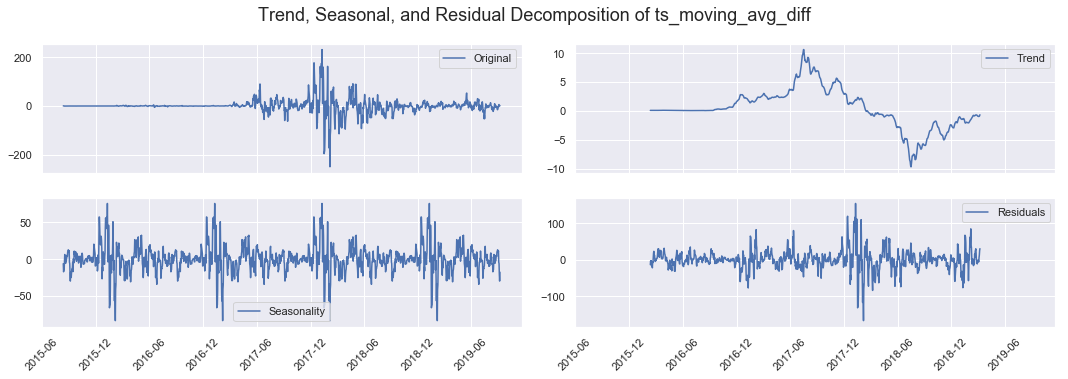

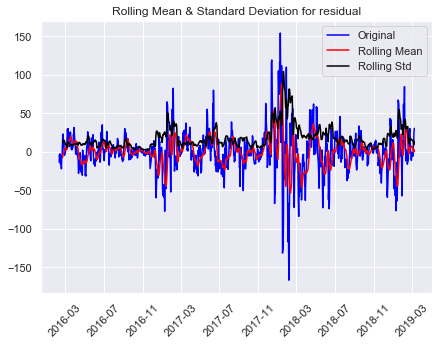

Results of Dickey-Fuller Test:
Test Statistic                -6.384511e+00
p-value                        2.180938e-08
# Lags Used                    2.000000e+01
Number of Observations Used    1.101000e+03
Critical Value (1%)           -3.436303e+00
Critical Value (5%)           -2.864169e+00
Critical Value (10%)          -2.568170e+00
dtype: float64


2.180938411261469e-08

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_example_transform['ts_moving_avg_diff'], freq = 365)

df_example_transform.loc[:,'trend'] = decomposition.trend
df_example_transform.loc[:,'seasonal'] = decomposition.seasonal
df_example_transform.loc[:,'residual'] = decomposition.resid

plot_decomposition(df = df_example_transform, 
                   ts = 'ts_moving_avg_diff', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

test_stationarity(df = df_example_transform.dropna(), ts = 'residual')

In [47]:
def plot_acf_pacf(df, ts):
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5)) 

    #Plot ACF: 

    ax1.plot(lag_acf)
    ax1.axhline(y=0,linestyle='--',color='gray')
    ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax1.set_title('Autocorrelation Function for %s' %(ts))

    #Plot PACF:
    ax2.plot(lag_pacf)
    ax2.axhline(y=0,linestyle='--',color='gray')
    ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
    ax2.set_title('Partial Autocorrelation Function for %s' %(ts))

    plt.tight_layout()
    plt.show()

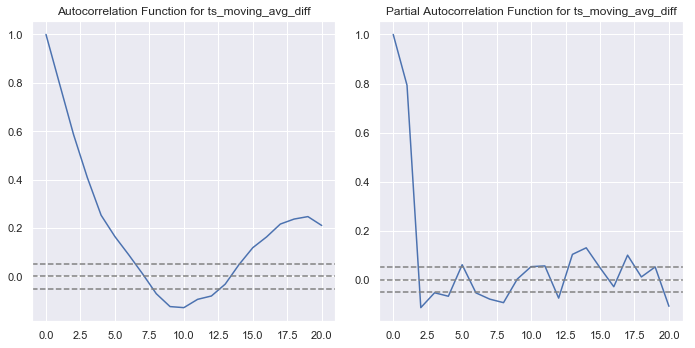

In [93]:
from statsmodels.tsa.stattools import acf, pacf

# determine ACF and PACF
lag_acf = acf(np.array(df_example_transform['ts_moving_avg_diff']), nlags = 20)
lag_pacf = pacf(np.array(df_example_transform['ts_moving_avg_diff']), nlags = 20)

# plot ACF and PACF
plot_acf_pacf(df = df_example_transform, ts = 'ts_moving_avg_diff')

# For Hanan again :)

I tried to test these transformations data using basic ARIMA model, and maybe you can try it with the model that you've make using this example

In [65]:
#change this using your model
def run_arima_model(df, ts, p, d, q):
    from statsmodels.tsa.arima_model import ARIMA

    # fit ARIMA model on time series
    model = ARIMA(df[ts], order=(p, d, q))  
    results_ = model.fit(disp=-1)  

    # get lengths correct to calculate RSS
    len_results = len(results_.fittedvalues)
    ts_modified = df[ts][-len_results:]

    # calculate root mean square error (RMSE) and residual sum of squares (RSS)
    rss = sum((results_.fittedvalues - ts_modified)**2)
    rmse = np.sqrt(rss / len(df[ts]))

    # plot fit
    plt.plot(df[ts])
    plt.plot(results_.fittedvalues, color = 'red')
    plt.title('For ARIMA model (%i, %i, %i) for ts %s, RSS: %.4f, RMSE: %.4f' %(p, d, q, ts, rss, rmse))

    plt.show()
    plt.close()

    return results_

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


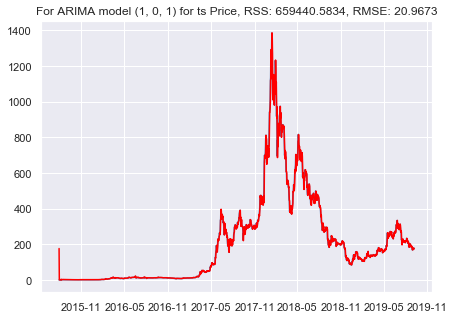

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


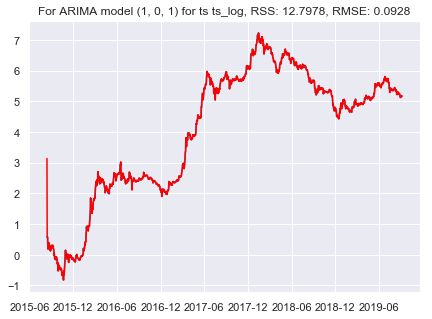

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: 

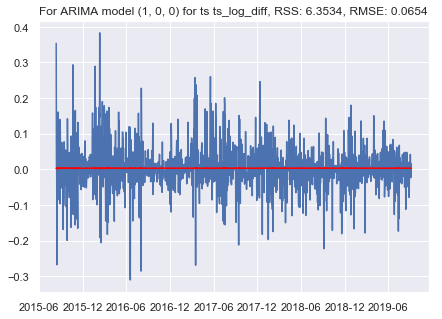

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


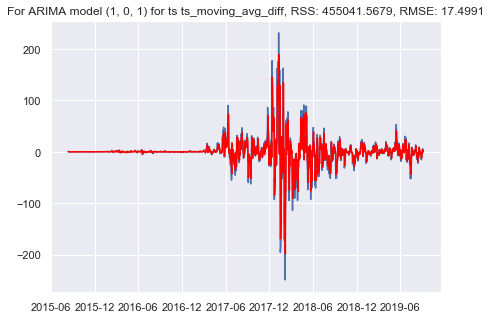

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


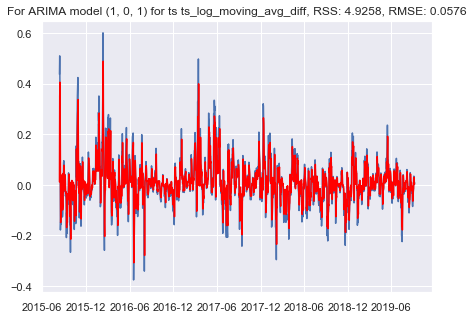

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


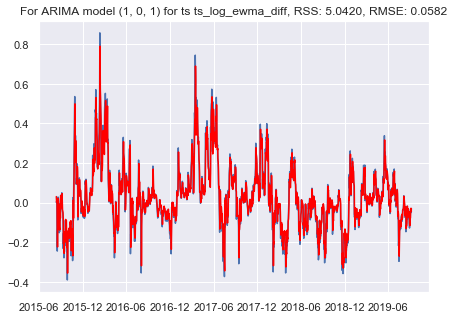

In [69]:
#No transformation
model_price = run_arima_model(df = etherPrice, 
                           ts = 'Price', 
                           p = 1, 
                           d = 0, 
                           q = 1)


#after transformation


model_ts_log = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log', 
                           p = 1, 
                           d = 0, 
                           q = 1)

model_ts_log_diff = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_diff', 
                           p = 1, 
                           d = 0, 
                           q = 0)

# supposed to fit the best based on the p_value
model_ts_moving_avg_diff = run_arima_model(df = df_example_transform, 
                           ts = 'ts_moving_avg_diff', 
                           p = 1, 
                           d = 0, 
                           q = 1)

model_ts_log_moving_avg_diff = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_moving_avg_diff', 
                           p = 1, 
                           d = 0, 
                           q = 1)

model_ts_log_ewma_diff = run_arima_model(df = df_example_transform, 
                           ts = 'ts_log_ewma_diff', 
                           p = 1, 
                           d = 0, 
                           q = 1)



# For Yasin ;)

since all model looks quite fine, I'm not sure how to evaluate these transformation to see whether ts_moving_avg_diff is actually deliver the best result or not, and the RMSE kinda not comaprable because of the different range of data. So could you help to find a way to evaluate this simple model? and then we can implement with hanan's model later

## 4) Model Fitting
### Grid search (Hyperparameter Tuning)

### Data Split train and test

### Fit the model and predict

## 5) Evaluation
### Some evaluation methods

### Evaluation plots and data comparison

### Conclusion